<a href="https://colab.research.google.com/github/kgeckin/Global_AI_Hub_Python_Bootcamp/blob/main/Netflix_Original_Films_%26_IMDB_Scores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center> <h1>Global AI Hub Python Summer Bootcamp</h1> </center>



<h2> Proje 2: Netflix Original Films & IMDB Scores </h2>
    
[Dataset](https://www.kaggle.com/datasets/luiscorter/netflix-original-films-imdb-scores)'e ulaşmak için tıklayınız.

In [410]:
#Kullanılacak kütüphaneler import edilir.

import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
pio.templates.default = "plotly_white"

In [411]:
data = pd.read_csv("/content/NetflixOriginals.csv", encoding = "ISO-8859-1")

In [412]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


In [413]:
data.head(11)

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
5,Drive,Action,"November 1, 2019",147,3.5,Hindi
6,Leyla Everlasting,Comedy,"December 4, 2020",112,3.7,Turkish
7,The Last Days of American Crime,Heist film/Thriller,"June 5, 2020",149,3.7,English
8,Paradox,Musical/Western/Fantasy,"March 23, 2018",73,3.9,English
9,Sardar Ka Grandson,Comedy,"May 18, 2021",139,4.1,Hindi


### Görev 1: Veri setine göre uzun soluklu filmler hangi dilde oluşturulmuştur? Görselleştirme yapınız.

In [414]:
median=data["Runtime"].quantile(q=0.5)
longruntime = data.loc[data["Runtime"] >= median, ["Language"]].value_counts()
longruntime.head(10)

Language  
English       200
Hindi          30
Spanish        15
French          8
Italian         8
Indonesian      7
Portuguese      7
Korean          5
Japanese        4
Marathi         3
dtype: int64

Text(0.5, 1.0, 'Languages of Movies with Longer Than Average Runtime')

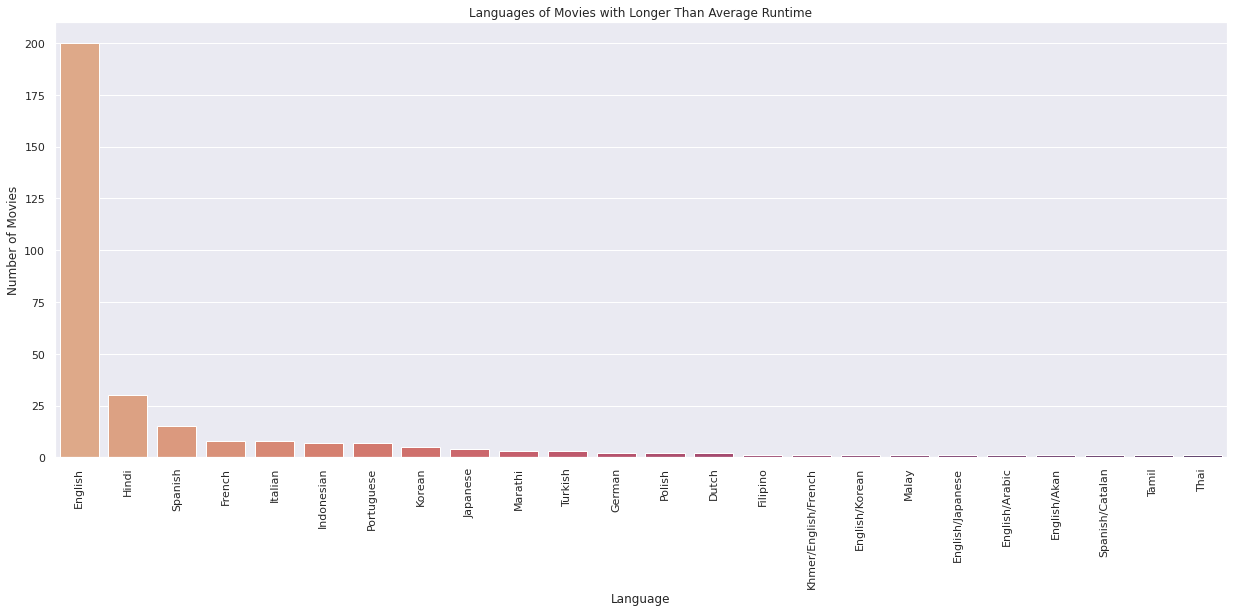

In [415]:
longruntime.plot.bar()
longtime= longruntime.reset_index().rename({0:"Number of Movies"},axis=1)
sns.set(rc = {'figure.figsize':(21, 8)})
movie = sns.barplot(x="Language",y="Number of Movies", 
                    data=longtime, palette='flare')
movie.set_title('Languages of Movies with Longer Than Average Runtime')


In [416]:
fig = px.scatter(data, x = "Language", y = "Runtime", color = "Runtime", 
                 size = "Runtime", width=1230, height=768,
                 #color_continuous_scale=["gray","#101c30"],
                 title = "Languages of Movies with Longer Than Average Runtime")
#fig.update_traces(marker_size=5)
#fig.update_layout(paper_bgcolor="#E50914")
fig.update_xaxes(tickangle = -60)
fig.show()

### Görev 2: 2019 Ocak ile 2020 Haziran tarihleri arasında 'Documentary' türünde çekilmiş filmlerin IMDB değerlerini bulup görselleştiriniz.

In [417]:
data["Premiere"] = pd.to_datetime(data.Premiere)
doc = data.loc[(data["Genre"] == "Documentary") & (data["Premiere"] >= '2019-01-01') & (data["Premiere"] <= '2020-06-30')]
doc

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese
15,After the Raid,Documentary,2019-12-19,25,4.3,Spanish
20,"Hello Privilege. It's Me, Chelsea",Documentary,2019-09-13,64,4.4,English
30,After Maria,Documentary,2019-05-24,37,4.6,English/Spanish
111,Ghosts of Sugar Land,Documentary,2019-10-16,21,5.5,English
151,One Take,Documentary,2020-06-18,85,5.7,Thai
263,A Tale of Two Kitchens,Documentary,2019-05-22,30,6.3,English/Spanish
286,The Legend of Cocaine Island,Documentary,2019-03-29,87,6.3,English
290,Travis Scott: Look Mom I Can Fly,Documentary,2019-08-28,85,6.3,English
295,Birders,Documentary,2019-09-25,37,6.4,English/Spanish


In [418]:
#First version
fig = px.bar(doc, x = "Title", y = "IMDB Score", 
             title = "IMDB Ratings of Documentaries Filmed in a Specific Time / Title",
             hover_data = ['IMDB Score'], color = 'IMDB Score',
             width = 1230, height = 768, text_auto='.2s')
#fig.update_traces(textfont_size = 12, textangle = 45, textposition = "inside", cliponaxis = False)
#fig.update_layout(paper_bgcolor="#E50914")
fig.update_xaxes(tickangle = -60)
fig.show()


In [419]:
# Second version
fig = px.scatter(doc, x = "Premiere", y = "IMDB Score", color = "Title" , 
                 title = "IMDB Ratings of Documentaries Filmed in a Specific Time / Premiere",
                 width = 1230, height = 768, color_discrete_sequence=px.colors.sequential.Agsunset)
fig.update_traces(marker_size=10)
#fig.update_layout(paper_bgcolor="#E50914")
#fig.update_yaxes(visible=False)
fig.show()

### Görev 3: İngilizce çekilen filmler içerisinde hangi tür en yüksek IMDB puanına sahiptir?

In [420]:
df = data.loc[(data["Language"]=="English")]
df = df.sort_values(['IMDB Score'], ascending=False)
df = df.head(12)
df

,Title,Genre,Premiere,Runtime,IMDB Score,Language
583,David Attenborough: A Life on Our Planet,Documentary,2020-10-04,83,9.0,English
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English
578,Ben Platt: Live from Radio City Music Hall,Concert Film,2020-05-20,85,8.4,English
577,Dancing with the Birds,Documentary,2019-10-23,51,8.3,English
576,Cuba and the Cameraman,Documentary,2017-11-24,114,8.3,English
574,Seaspiracy,Documentary,2021-03-24,89,8.2,English
573,Klaus,Animation/Christmas/Comedy/Adventure,2019-11-15,97,8.2,English
572,Disclosure: Trans Lives on Screen,Documentary,2020-06-19,107,8.2,English
571,13th,Documentary,2016-10-07,100,8.2,English


In [421]:
fig = px.pie(df, values='IMDB Score', names='Title',
             title='IMDB Score Distribution Based on Genres in English Language',
             color_discrete_sequence=px.colors.sequential.Agsunset,
             hover_data=['Genre'], width = 1230, height = 768)
fig.update_traces(textposition='inside', textinfo='value', textfont_size=15,
                  marker_line_color='rgb(8,48,107)',marker_line_width=1.5, opacity=0.9)
#fig.update_layout(paper_bgcolor="#E50914")
fig.show()


### Görev 4: 'Hindi' Dilinde çekilmiş olan filmlerin ortalama 'runtime' suresi nedir?

In [422]:
dx = data.loc[data["Language"]=="Hindi","Runtime"].mean()
dx

115.78787878787878

### Görev 5: 'Genre' Sütunu kaç kategoriye sahiptir ve bu kategoriler nelerdir? Görselleştirerek ifade ediniz.


In [423]:
genres = data[['Genre']]
genres

,Genre
0,Documentary
1,Thriller
2,Science fiction/Drama
3,Horror thriller
4,Mystery
...,...
579,Concert Film
580,Documentary
581,One-man show
582,Documentary


In [424]:
gen_fig = px.histogram(genres, x = "Genre",
                       color_discrete_sequence = ['fuchsia'],
                       hover_data=genres.columns, title = 'Category of Genre',
                       width = 1230, height = 768).update_xaxes(categoryorder="max descending")
gen_fig.update_layout(bargap=0.2, bargroupgap=0.1)
gen_fig.update_xaxes(tickangle = -60)

gen_fig.show()

In [425]:
gen_uni = data["Genre"].unique()
len(gen_uni)

115

In [426]:
gen_uni 


array(['Documentary', 'Thriller', 'Science fiction/Drama',
       'Horror thriller', 'Mystery', 'Action', 'Comedy',
       'Heist film/Thriller', 'Musical/Western/Fantasy', 'Drama',
       'Romantic comedy', 'Action comedy', 'Horror anthology',
       'Political thriller', 'Superhero-Comedy', 'Horror',
       'Romance drama', 'Anime / Short', 'Superhero', 'Heist', 'Western',
       'Animation/Superhero', 'Family film', 'Action-thriller',
       'Teen comedy-drama', 'Romantic drama', 'Animation',
       'Aftershow / Interview', 'Christmas musical',
       'Science fiction adventure', 'Science fiction', 'Variety show',
       'Comedy-drama', 'Comedy/Fantasy/Family', 'Supernatural drama',
       'Action/Comedy', 'Action/Science fiction',
       'Romantic teenage drama', 'Comedy / Musical', 'Musical',
       'Science fiction/Mystery', 'Crime drama',
       'Psychological thriller drama', 'Adventure/Comedy', 'Black comedy',
       'Romance', 'Horror comedy', 'Christian musical',
       'Rom

### Görev 6: Veri setinde bulunan filmlerde en çok kullanılan 3 dili bulunuz.

In [427]:
lan = data.value_counts("Language")
lan = lan.head(3)
lan

Language
English    401
Hindi       33
Spanish     31
dtype: int64

In [428]:
fig = px.treemap(data, path=['Language'],
                 color_continuous_scale='RdBu',
                 width = 1230, height = 768,
                 color_discrete_sequence=px.colors.sequential.Agsunset,
                 title = "Top Languages")
#fig.update_traces(root_color="lightgrey")

fig.show()

### Görev 7: IMDB puanı en yüksek olan ilk 10 film hangileridir?

In [429]:
top = data.sort_values(['IMDB Score'], ascending=False).groupby('Title').head()
top = top.head(10)
top

,Title,Genre,Premiere,Runtime,IMDB Score,Language
583,David Attenborough: A Life on Our Planet,Documentary,2020-10-04,83,9.0,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91,8.4,English/Ukranian/Russian
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English
578,Ben Platt: Live from Radio City Music Hall,Concert Film,2020-05-20,85,8.4,English
577,Dancing with the Birds,Documentary,2019-10-23,51,8.3,English
576,Cuba and the Cameraman,Documentary,2017-11-24,114,8.3,English
573,Klaus,Animation/Christmas/Comedy/Adventure,2019-11-15,97,8.2,English
571,13th,Documentary,2016-10-07,100,8.2,English


In [430]:
fig = px.funnel_area(top, values = 'IMDB Score', names = 'Title', color = 'Genre',
                     width = 1230, height = 768, hover_name = "Genre",
                     title = "Top 10 Languages", color_discrete_sequence=px.colors.sequential.Agsunset)
fig.update_traces(textposition='inside', textinfo='value+label')
fig.show()

### Görev 8: IMDB puanı ile 'Runtime' arasında nasıl bir korelasyon vardır? İnceleyip görselleştiriniz.

In [431]:
data.corr()

,Runtime,IMDB Score
Runtime,1.000000,-0.040896
IMDB Score,-0.040896,1.000000


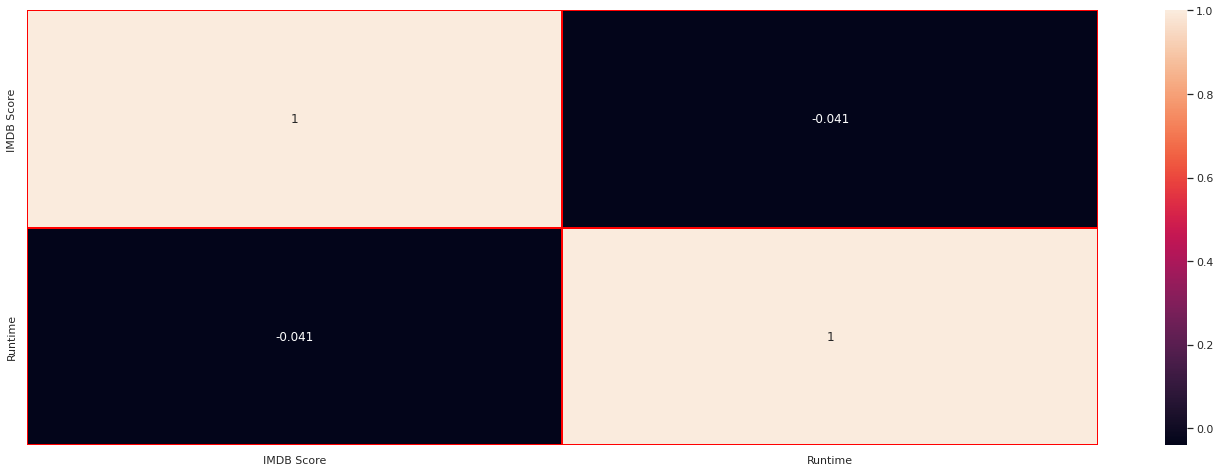

In [432]:
linewidths = 1
linecolor = "red"
sns.set(rc = {'figure.figsize':(24, 8)})
sns.heatmap(data[[ 'IMDB Score', 'Runtime']].corr(), linewidths = linewidths, linecolor = linecolor,  annot = True)

In [433]:
corr = px.scatter(data, x='IMDB Score', y='Runtime', color='Runtime',
                  title = "Correlation between IMDB Score and Runtime",
                  width = 1230, height = 768, color_discrete_sequence=px.colors.sequential.Agsunset)
corr.update_traces(marker_size=5)
corr.show()

### Görev 9: IMDB Puanı en yüksek olan ilk 10 'Genre' hangileridir? Görselleştiriniz.

In [434]:
top_genres = data.groupby("Genre").max().sort_values(by="IMDB Score",ascending=False).head(10)
top_genres 

,Title,Premiere,Runtime,IMDB Score,Language
Genre,,,,,
Documentary,Zion,2021-05-26,144,9.0,Thia/English
One-man show,Springsteen on Broadway,2018-12-16,153,8.5,English
Concert Film,Taylor Swift: Reputation Stadium Tour,2020-12-21,125,8.4,English
Animation/Christmas/Comedy/Adventure,Klaus,2019-11-15,97,8.2,English
Drama,Yeh Ballet,2021-05-27,151,7.9,Turkish
Animation / Short,Sitara: Let Girls Dream,2020-12-28,15,7.8,English
Crime drama,Òlòt?ré,2021-05-14,209,7.8,Spanish
Musical / Short,Anima,2019-06-27,15,7.7,English
Making-of,The Road to El Camino: A Breaking Bad Movie,2020-02-11,72,7.7,Spanish


In [435]:
tgenre = data.loc[data['Genre'].isin(["Documentary", "One-man show", "Concert Film", "Animation/Christmas/Comedy/Adventure", "Drama", "Animation / Short", "Crime drama", "Musical / Short", "Making-of", "War drama"])]

fig = px.strip(tgenre, 
             x = "Genre", 
             y = tgenre["IMDB Score"],
             color = "Genre",
             hover_name = "Title",
             title = "Top 10 Genre with range of IMDB Score",
             width = 1230, height = 768, 
             color_discrete_sequence=px.colors.sequential.Agsunset)
fig.update_xaxes(tickangle = -60)
fig.show()

### Görev 10: 'Runtime' değeri en yüksek olan ilk 10 film hangileridir? Görselleştiriniz.


In [436]:
rtime = data.sort_values(['Runtime'], ascending=False).groupby('Title').head(10)
rtime = rtime.head(10)
rtime

,Title,Genre,Premiere,Runtime,IMDB Score,Language
561,The Irishman,Crime drama,2019-11-27,209,7.8,English
328,Da 5 Bloods,War drama,2020-06-12,155,6.5,English
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English
247,Citation,Drama,2020-11-06,151,6.2,English
284,The Forest of Love,Drama,2019-10-11,151,6.3,Japanese
509,Raat Akeli Hai,Thriller,2020-07-31,149,7.3,Hindi
7,The Last Days of American Crime,Heist film/Thriller,2020-06-05,149,3.7,English
543,Ludo,Anthology/Dark comedy,2020-11-12,149,7.6,Hindi
194,Army of the Dead,Zombie/Heist,2021-05-21,148,5.9,English
5,Drive,Action,2019-11-01,147,3.5,Hindi


In [437]:
fig = px.bar(rtime, x="Title", y="Runtime", color = "Runtime",
             hover_name= "Genre", width = 1230, height = 768, 
             color_discrete_sequence=px.colors.sequential.Agsunset,
             title = "Top 10 Runtime")
fig.update_xaxes(tickangle = -60)
fig.show()

### Görev 11: Hangi yılda en fazla film yayımlanmıştır? Görselleştiriniz.

In [438]:
years = data['Year'] = data['Premiere'].apply(lambda x: "%d" % (x.year))
years = data.groupby(['Year']).size()
years

Year
2014      1
2015      9
2016     30
2017     66
2018     99
2019    125
2020    183
2021     71
dtype: int64

In [439]:
years = years.to_frame().reset_index()
years.columns = ['Year', 'Count']
years

,Year,Count
0,2014,1
1,2015,9
2,2016,30
3,2017,66
4,2018,99
5,2019,125
6,2020,183
7,2021,71


In [440]:
fig = px.pie(years, names="Year", values="Count", color = "Year",
             width = 1230, height = 768, 
             color_discrete_sequence=px.colors.sequential.Agsunset,
             title = "Most Number of Movies with Years")
fig.update_traces(textposition='inside', textinfo='value',
                  marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.0, opacity=0.9)
fig.show()


### Görev 12: Hangi dilde yayımlanan filmler en düşük ortalama IMBD puanına sahiptir? Görselleştiriniz.

In [441]:
worst_movies = data[['IMDB Score', 'Language', 'Title'  ]]
worst_movies = worst_movies.sort_values(['IMDB Score'], ascending=True)
worst_movies = worst_movies.head(10)
worst_movies

,IMDB Score,Language,Title
0,2.5,English/Japanese,Enter the Anime
1,2.6,Spanish,Dark Forces
2,2.6,Italian,The App
3,3.2,English,The Open House
4,3.4,Hindi,Kaali Khuhi
5,3.5,Hindi,Drive
6,3.7,Turkish,Leyla Everlasting
7,3.7,English,The Last Days of American Crime
8,3.9,English,Paradox
9,4.1,Hindi,Sardar Ka Grandson


In [442]:
fig = px.bar(worst_movies, y = "IMDB Score", x = "Language", title = "10 Worst IMDB Ratings", 
             color ="Title", width = 1230, height = 768, text_auto=True, text = "Title")
fig.update_traces(marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.9)
fig.show()

### Görev 13: Hangi yılın toplam "runtime" süresi en fazladır?

In [445]:
year = data[data.Runtime == data.Runtime.max()]["Premiere"]
year = df.Year.value_counts()
runtime_year = data.groupby("Year").agg({"Runtime": "sum"}).sort_values(by="Runtime", ascending=False)
runtime_year

AttributeError: ignored

### Görev 14: Her bir dilin en fazla kullanıldığı "Genre" nedir?

In [446]:
mostgenre = data.groupby(["Genre"])['Language'].size()
mostgenre

Genre
Action              7
Action comedy       5
Action thriller     1
Action-adventure    1
Action-thriller     3
                   ..
War                 2
War drama           2
War-Comedy          1
Western             3
Zombie/Heist        1
Name: Language, Length: 115, dtype: int64

In [447]:
mostgenre = mostgenre.to_frame().reset_index()
mostgenre.columns = ['Genre', 'Number of Language']
mostgenre

,Genre,Number of Language
0,Action,7
1,Action comedy,5
2,Action thriller,1
3,Action-adventure,1
4,Action-thriller,3
...,...,...
110,War,2
111,War drama,2
112,War-Comedy,1
113,Western,3


In [448]:
fig = px.scatter(mostgenre, x = "Genre", y = "Number of Language", title = "Number of Languages Used by Genre", 
                 color = "Genre", width = 1230, height = 768)
fig.update_xaxes(tickangle = -60, visible=False )
fig.update_traces(marker=dict(size=12,
                              line=dict(width=1,
                              color='DarkSlateGrey')),
                              selector=dict(mode='markers'))
fig.show()


In [449]:
greatest_genre = data[['Genre', 'Language']].groupby(["Language"])['Genre'].agg(pd.Series.mode).to_frame().reset_index()


In [450]:
fig = px.scatter(greatest_genre, x = "Genre", y = "Language", title = "Most Used Languages by Genre", 
             color ="Language", width = 1230, height = 768)
fig.update_xaxes(tickangle = -60)
fig.update_traces(marker=dict(size=12,
                              line=dict(width=1,
                              color='DarkSlateGrey')),
                              selector=dict(mode='markers'))
fig.show()


[<img src="https://marka-logo.com/wp-content/uploads/2020/04/Linkedin-Logo.png" width="100" height="60">](https://www.linkedin.com/in/krgckn/)   

